**Exercise 17.2**

Numerical T(3600) = 167.62813675022997 C
Analytical T(3600) = 166.80492089227107 C


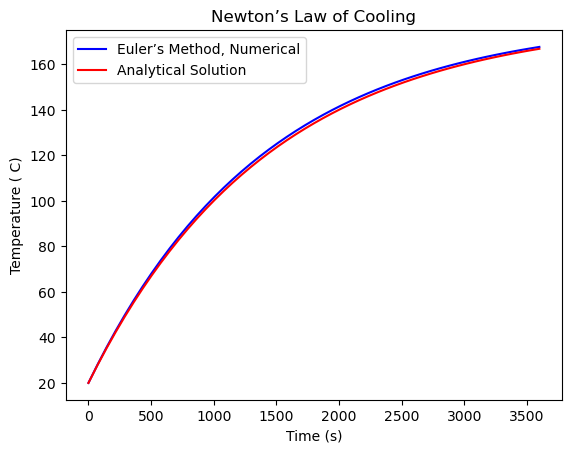

In [31]:
import numpy as np
import matplotlib.pyplot as plt

tH = 1000.0      # half--life in seconds
Ta = 180.0       # ambient temperature in Celcius (C)
Tinitial = 20.0  # initial temperature (C)
tinitial = 0.0   # initial time (s)
tfinal = 3600.0  # final time (s)
N = 50           # number of timesteps (s), adjust - the higher the N the more accurate   

Deltat = ( tfinal - tinitial ) / N   # compute Delta t 
k = np.log( 2 ) / tH                 # compute k 

# Create arrays to hold times and temperatures 
t = np.linspace( tinitial, tfinal, N+1 ) 
T = np.zeros( len(t) ) 

# Solve using Euler’s method

T[ 0 ] = Tinitial # initial temperature 
for i in range( N ): #loop for N time steps 
    T[ i + 1 ] = T[ i ] - k * ( T[ i ] - Ta) * Deltat

# Analytical solution --> T(t) = Ta + (T0 - Ta) * exp(-k * t)
T_exact = Ta + ( Tinitial - Ta ) * np.exp( -k * t )

print( f"Numerical T(3600) = {T[ -1 ]} C" )
print( f"Analytical T(3600) = {T_exact[ -1 ]} C" )

# Plot results
plt.close()
fig, ( ax ) = plt.subplots( 1, 1 )
ax.plot( t, T, color="blue", label="Euler’s Method, Numerical" )
ax.plot( t, T_exact, color="red", label="Analytical Solution" )
plt.xlabel( "Time (s)" )
plt.ylabel( "Temperature ( C)" )
plt.title( "Newton’s Law of Cooling" )
plt.legend()
plt.show()

**Exercise 17.3a**

The slope of the graph is -1, as expected. 

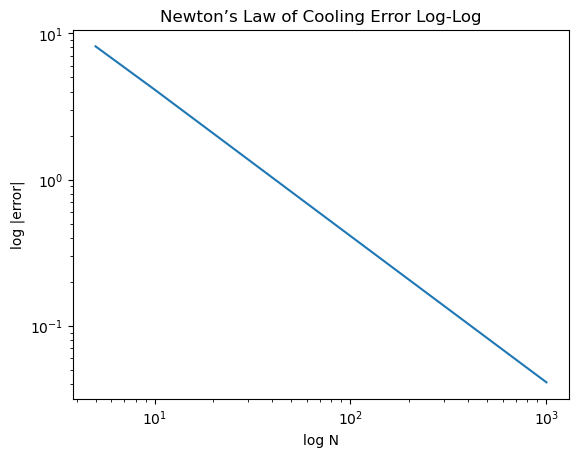

Slope of log-log plot = -1.00


In [19]:
import numpy as np
import matplotlib.pyplot as plt

def newton_cooling_error( N ):
    tH = 1000.0      # half--life in seconds
    Ta = 180.0       # ambient temperature in Celcius (C)
    Tinitial = 20.0  # initial temperature (C)
    tinitial = 0.0   # initial time (s)
    tfinal = 3600.0  # final time (s)
    # N = N           # number of timesteps (s), adjust - the higher the N the more accurate   
    
    Deltat = ( tfinal - tinitial ) / N   # compute Delta t 
    k = np.log( 2 ) / tH                 # compute k 
    
    # Create arrays to hold times and temperatures 
    t = np.linspace( tinitial, tfinal, N+1 ) 
    T = np.zeros( len(t) ) 
    
    # Solve using Euler’s method
    
    T[ 0 ] = Tinitial # initial temperature 
    for i in range( N ): #loop for N time steps 
        T[ i + 1 ] = T[ i ] - k * ( T[ i ] - Ta) * Deltat
    
    # Analytical solution --> T(t) = Ta + (T0 - Ta) * exp(-k * t)
    T_exact = Ta + ( Tinitial - Ta ) * np.exp( -k * t )

    # Error 
    error = np.abs( T[ -1 ] - T_exact[ -1 ] )

    return error


N = np.array( [ 5, 10, 20, 50, 100, 200, 500, 1000 ] )
errors = np.array( [ newton_cooling_error( int(i) ) for i in N ] )

plt.close()
plt.loglog( N, errors )
plt.xlabel( "log N" )
plt.ylabel( "log |error|" )
plt.title( "Newton’s Law of Cooling Error Log-Log" )
plt.show()


**Exercise 17.4a**

The body temperature at T = 16000s is about 113.4 C. 

In [30]:
import numpy as np

def body_temp( N ):
    # Parameters
    a = 100.0        # average ambient temperature (C)
    b = 40.0         # amplitude of variation (C)
    c = 1000.0       # period factor (s)
    Tinitial = 140.0 # initial temperature (C)
    k = 0.001        # cooling constant (1/s)
    tinitial = 0.0   # initial time (s)
    tfinal = 16000.0 # final time (s)
    
    # Step size
    Deltat = ( tfinal - tinitial ) / N
    
    # Arrays
    t = np.linspace( tinitial, tfinal, N + 1 )
    T = np.zeros( len( t ))
    
    # Initial condition
    T[ 0 ] = Tinitial
    
    # Euler’s method
    for i in range(N):
        Ta = a + b * np.sin( t[ i ] / c )        
        T[ i + 1 ] = T[ i ] - k * ( T[ i ] - Ta ) * Deltat
    
    # Final temperature
    print(f"{T[ -1 ]:.4f} C, N={N}")


for N in range( 1500, 1, 10 ):
    body_temp( N )


113.4975 C, N=1500
113.4968 C, N=1510
113.4962 C, N=1520
113.4955 C, N=1530
113.4949 C, N=1540
113.4942 C, N=1550
113.4936 C, N=1560
113.4929 C, N=1570
113.4923 C, N=1580
113.4917 C, N=1590


**Exercise 17.5**

As N gets higher, the three point convergence test converges to 2. 

In [36]:
import numpy as np

def body_temp( N ):
    # Parameters
    a = 100.0        # average ambient temperature (C)
    b = 40.0         # amplitude of variation (C)
    c = 1000.0       # period factor (s)
    Tinitial = 140.0 # initial temperature (C)
    k = 0.001        # cooling constant (1/s)
    tinitial = 0.0   # initial time (s)
    tfinal = 16000.0 # final time (s)
    
    # Step size
    Deltat = ( tfinal - tinitial ) / N
    
    # Arrays
    t = np.linspace( tinitial, tfinal, N + 1 )
    T = np.zeros( len( t ))
    
    # Initial condition
    T[ 0 ] = Tinitial
    
    # Euler’s method
    for i in range(N):
        Ta = a + b * np.sin( t[ i ] / c )        
        T[ i + 1 ] = T[ i ] - k * ( T[ i ] - Ta ) * Deltat
    
    # Final temperature
    return T[ -1 ] 

def three_point_convergence( N ):
    numerator = body_temp( N ) - body_temp( 2 * N )
    denominator = body_temp( 2 * N ) - body_temp( 4 * N )
    return numerator / denominator

print( three_point_convergence( 10000 ) )


2.00054024951325


**Exercise 17.6b**

(Unfinished) 

In [38]:
import numpy as np

def f( x ):
    return np.log( x + np.cos( x ) )

# f - function, a & b - endpoints, N - intervals
def simpsons_rule( f, a, b, N ):
    delta_x = ( b - a ) / N
    
    # for loop 1
    summation1 = 0
    for i in range( 1, N ):
        x_i = a + i * delta_x
        summation1 += f( x_i )
        
    # for loop 2
    summation2 = 0
    for i in range( 1, N + 1 ):
        x_im1 = a + ( i - 1 ) * delta_x
        x_i = a + i * delta_x
        summation2 += f( ( x_im1 + x_i ) / 2 )
        
    # part of Simpson's in brackets
    brackets = f( a ) + f(  b) + 2 * summation1 + 4 * summation2
    
    # final result
    return ( delta_x / 6 ) * brackets

def simpsons_extrapolated( f, a, b, N ):
    I_N = simpsons_rule( f, a, b, N )
    I_2N = simpsons_rule( f, a, b, 2 * N )
    return I_2N - I_N

# Didn't get to finish

**Reference Euler's Method**

In [ ]:

import numpy as np

"""
    Solve dy/dt = f(t, y) using Euler's method.

    Parameters:
    f : Function defining the ODE (dy/dt = f(t, y))
    y0 : Initial value of y
    t0 : Initial time
    tf : Final time
    N : Number of time steps

    Returns:
    t : Array of time points
    y : Array of approximate y values at each time point
    """
def eulers_method(f, y0, t0, tf, N):
    dt = (tf - t0) / N
    t = np.linspace(t0, tf, N + 1)
    y = np.zeros(N + 1)
    y[0] = y0

    for i in range(N):
        y[i + 1] = y[i] + f(t[i], y[i]) * dt 

    return t, y
    